In [151]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Dense, Convolution2D, MaxPooling2D, Activation, BatchNormalization, Input, Flatten
import scipy.misc
from glob import glob
from sklearn.model_selection import train_test_split

In [169]:
categories = glob('101_ObjectCategories/*')
index = 0
def readRandomNonFace():
    reroll = True
    
    while reroll:
        random_category_files = glob('%s/*' % categories[int(np.random.random(1)*len(categories))])
        while(len(random_category_files) == 0):
            random_category_files = glob('%s/*' % categories[int(np.random.random(1)*len(categories))])

        counter = 0
        
        index = int(np.random.random(1)*len(random_category_files))
        x = plt.imread(random_category_files[index])  
        if(len(x.shape) == 3):
            reroll = False
                
        while(len(x.shape) != 3 and counter<10):
            index = int(np.random.random(1)*len(random_category_files))
            x = plt.imread(random_category_files[index])    
            counter += 1
            
            if(len(x.shape) == 3):
                reroll = False

    return x

In [205]:
faces = [scipy.misc.imresize(plt.imread(i), (32, 32, 3)) for i in glob('Faces/*')]
nonFaces = [scipy.misc.imresize(readRandomNonFace(), (32, 32, 3)) for i in range(len(faces))]

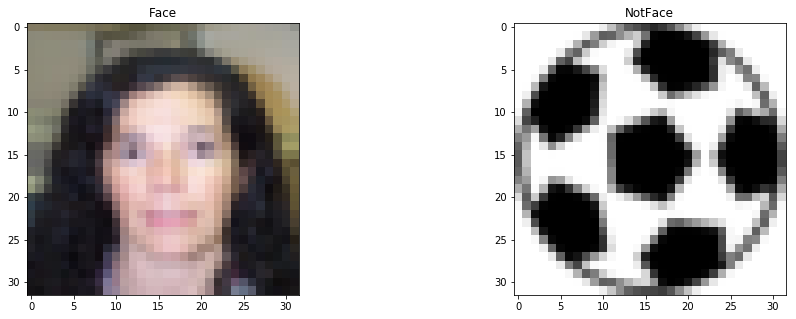

In [206]:
x1 = faces[int(np.random.random(1)*len(faces))]
x2 = nonFaces[int(np.random.random(1)*len(nonFaces))]

plt.figure(figsize=(16, 5))
plt.subplot(121)
plt.imshow(x1)
plt.title('Face');

plt.subplot(122)
plt.imshow(x2)
plt.title('NotFace');

In [207]:
X = np.concatenate(faces + nonFaces).reshape((870, 32, 32, 3))
y = [(1, 0) for i in range(len(faces))]
y.extend([(0, 1) for i in range(len(nonFaces))])
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [211]:
input_layer = Input(shape=(32, 32, 3))

layer = Convolution2D(32, (3, 3), padding='same')(input_layer)
layer = Activation('relu')(layer)
layer = MaxPooling2D((2, 2))(layer)

layer = Convolution2D(64, (3, 3), padding='same')(layer)
layer = Activation('relu')(layer)
layer = MaxPooling2D((2, 2))(layer)

layer = Flatten()(layer)

layer = Dense(512)(layer)
layer = Activation('relu')(layer)
layer = BatchNormalization()(layer)

layer = Dense(256)(layer)
layer = Activation('relu')(layer)

layer = Dense(128)(layer)
layer = Activation('relu')(layer)
layer = BatchNormalization()(layer)

layer = Dense(64)(layer)
layer = Activation('relu')(layer)

prediction = Dense(2)(layer)
prediction = Activation('softmax')(prediction)

model = Model(input_layer, prediction)

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_39 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_40 (Activation)   (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 8, 8, 64)          0         
__________

In [212]:
model.fit(X_train, y_train, batch_size=64, epochs=5, validation_split=0.1)

Train on 626 samples, validate on 70 samples
Epoch 1/20
626/626 [==============================] - 6s 9ms/step - loss: 0.3408 - acc: 0.8435 - val_loss: 1.0654 - val_acc: 0.6429
Epoch 2/20
626/626 [==============================] - 5s 7ms/step - loss: 0.0838 - acc: 0.9808 - val_loss: 0.7117 - val_acc: 0.8000
Epoch 3/20
626/626 [==============================] - 6s 10ms/step - loss: 0.0358 - acc: 0.9904 - val_loss: 0.1064 - val_acc: 0.9714
Epoch 4/20
626/626 [==============================] - 4s 7ms/step - loss: 0.0279 - acc: 0.9920 - val_loss: 0.3276 - val_acc: 0.9429
Epoch 5/20
626/626 [==============================] - 5s 7ms/step - loss: 0.0302 - acc: 0.9888 - val_loss: 6.3770 - val_acc: 0.5429
Epoch 6/20
626/626 [==============================] - 4s 7ms/step - loss: 0.0098 - acc: 0.9984 - val_loss: 0.1248 - val_acc: 0.9714
Epoch 7/20
626/626 [==============================] - 5s 7ms/step - loss: 0.0081 - acc: 0.9984 - val_loss: 0.2781 - val_acc: 0.8714
Epoch 8/20
626/626 [==========

In [213]:
model.evaluate(X_test, y_test)

174/174 [==============================] - 0s 3ms/step


[0.04023357763941314, 0.99425287356321834]

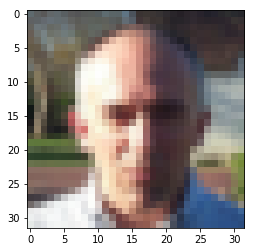

In [223]:
# for i in X_test:
for i, j, k in zip(np.round(model.predict(X_test)), y_test, X_test):
    if i[0] != j[0]:
        plt.imshow(k)